In [4]:
from seir_simulations import simulate_seir, set_seed
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Let's analyze how different parameters influence the plot

In [5]:
def plot_seir_simulation(N=1000, k_avg=4, max_steps=150, beta=0.2, sigma=0.1, gamma=0.1, initial_infected_fraction=0.01, seed=123):
    set_seed(seed)

    p = k_avg / N
    m = k_avg // 2

    # ER network
    G_er = nx.erdos_renyi_graph(N, p)

    # BA network
    G_ba = nx.barabasi_albert_graph(N, m)

    params = dict(
        beta=beta,
        sigma=sigma,
        gamma=gamma,
        initial_infected_fraction=initial_infected_fraction,
        max_steps=max_steps,
    )

    S_er, E_er, I_er, R_er = simulate_seir(G_er, **params)
    S_ba, E_ba, I_ba, R_ba = simulate_seir(G_ba, **params)

    T = len(S_er)
    t = np.arange(T)

    colors = {
        "S": "#4C72B0",
        "E": "#DD8452",
        "I": "#C44E52",
        "R": "#55A868",
    }

    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    # -------- ER --------
    axes[0].plot(t, S_er, color=colors["S"], label="S")
    axes[0].plot(t, E_er, color=colors["E"], label="E")
    axes[0].plot(t, I_er, color=colors["I"], label="I")
    axes[0].plot(t, R_er, color=colors["R"], label="R")

    axes[0].fill_between(t, S_er, color=colors["S"], alpha=0.15)
    axes[0].fill_between(t, E_er, color=colors["E"], alpha=0.15)
    axes[0].fill_between(t, I_er, color=colors["I"], alpha=0.15)
    axes[0].fill_between(t, R_er, color=colors["R"], alpha=0.15)

    axes[0].set_title("SEIR on ER network")
    axes[0].set_xlabel("Time")
    axes[0].set_ylabel("Fraction of population")
    axes[0].set_ylim(0, 1)
    axes[0].grid(True, alpha=0.3)

    # -------- BA --------
    axes[1].plot(t, S_ba, color=colors["S"])
    axes[1].plot(t, E_ba, color=colors["E"])
    axes[1].plot(t, I_ba, color=colors["I"])
    axes[1].plot(t, R_ba, color=colors["R"])

    axes[1].fill_between(t, S_ba, color=colors["S"], alpha=0.15)
    axes[1].fill_between(t, E_ba, color=colors["E"], alpha=0.15)
    axes[1].fill_between(t, I_ba, color=colors["I"], alpha=0.15)
    axes[1].fill_between(t, R_ba, color=colors["R"], alpha=0.15)

    axes[1].set_title("SEIR on BA network")
    axes[1].set_xlabel("Time")
    axes[1].set_ylim(0, 1)
    axes[1].grid(True, alpha=0.3)

    # Shared legend
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=4)

    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.show()

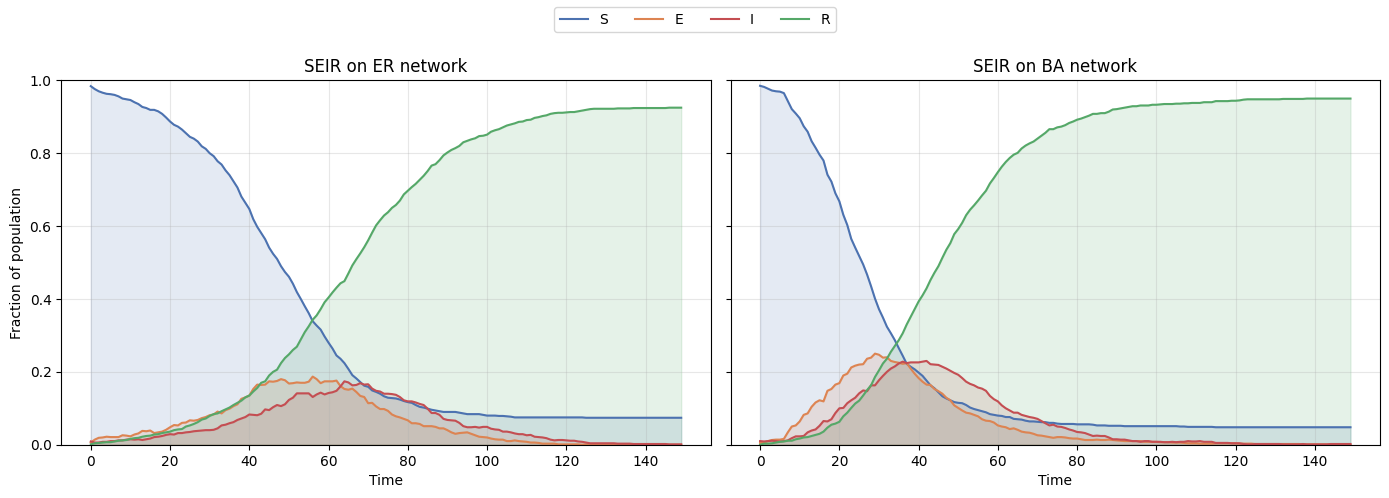

In [ ]:
# initial parameters
plot_seir_simulation(beta=0.2, sigma=0.1, gamma=0.1)

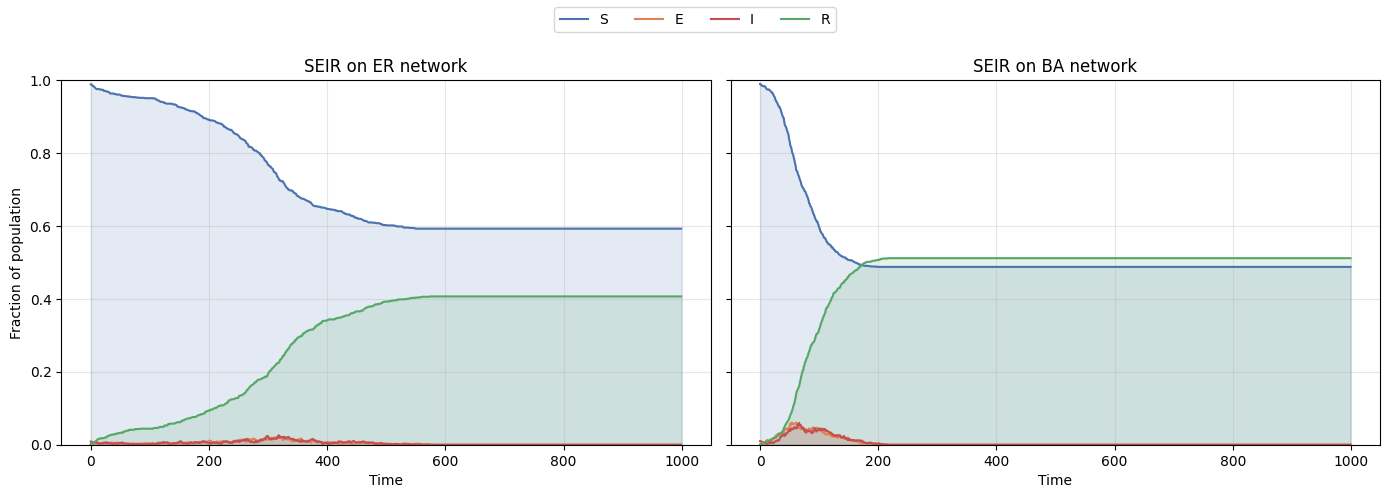

In [19]:
# lower beta
plot_seir_simulation(beta=0.05, sigma=0.1, gamma=0.1, max_steps=1000)

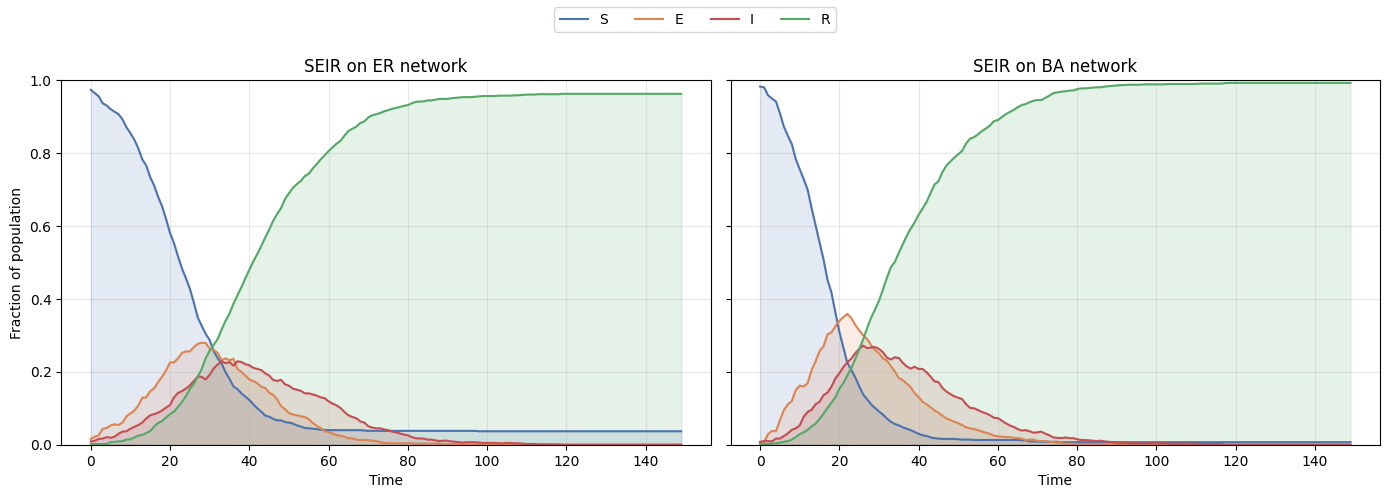

In [20]:
# higher beta
plot_seir_simulation(beta=0.4, sigma=0.1, gamma=0.1)

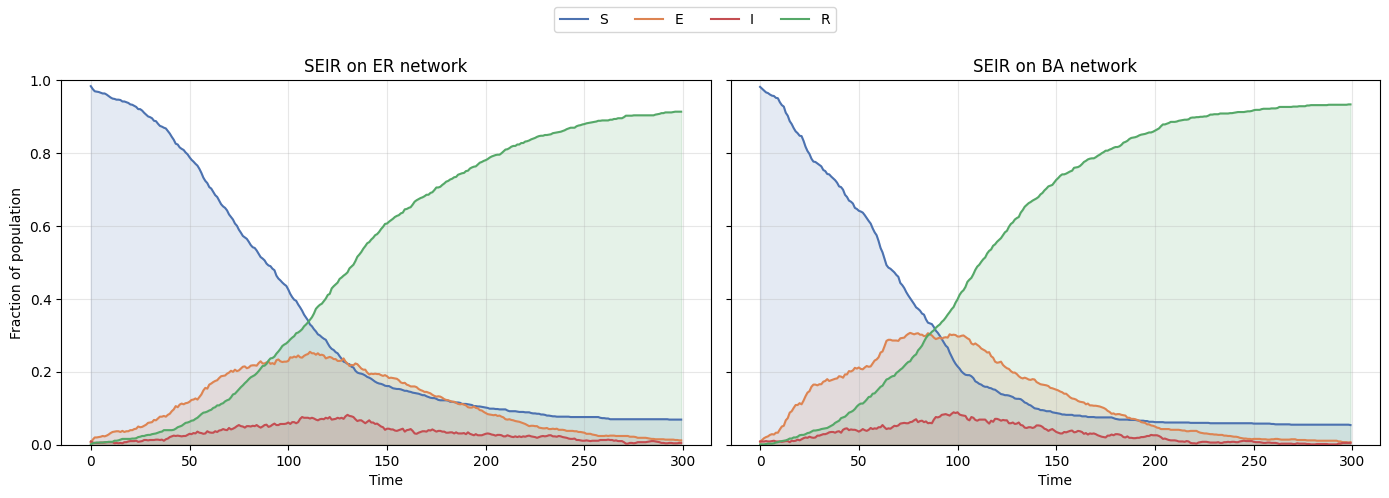

In [22]:
# lower sigma
plot_seir_simulation(beta=0.2, sigma=0.025, gamma=0.1, max_steps=300)

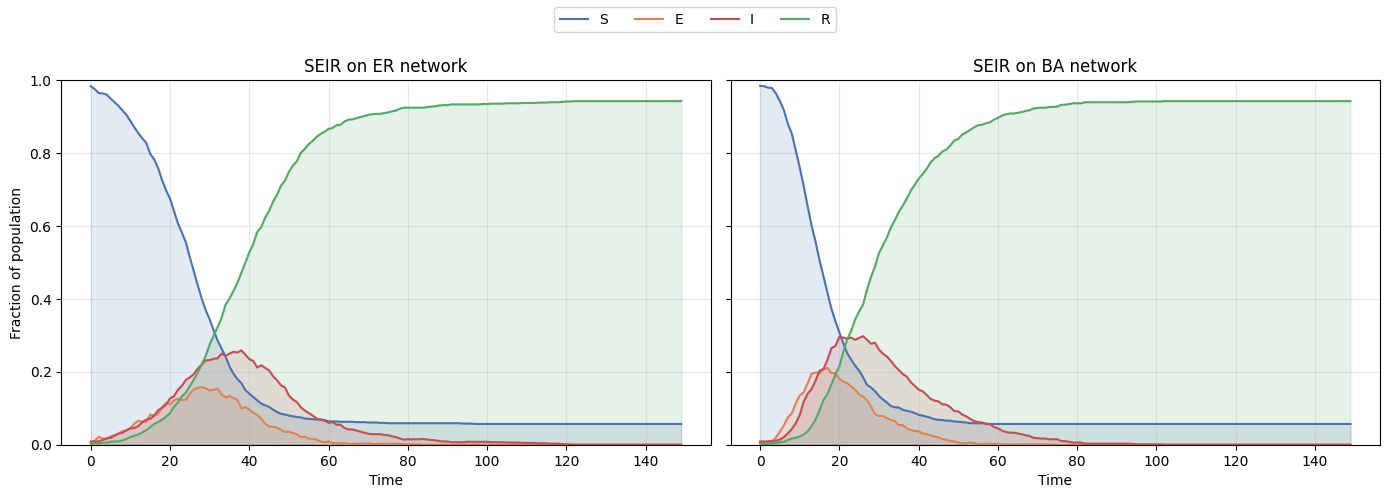

In [26]:
# higher sigma
plot_seir_simulation(beta=0.2, sigma=0.2, gamma=0.1)

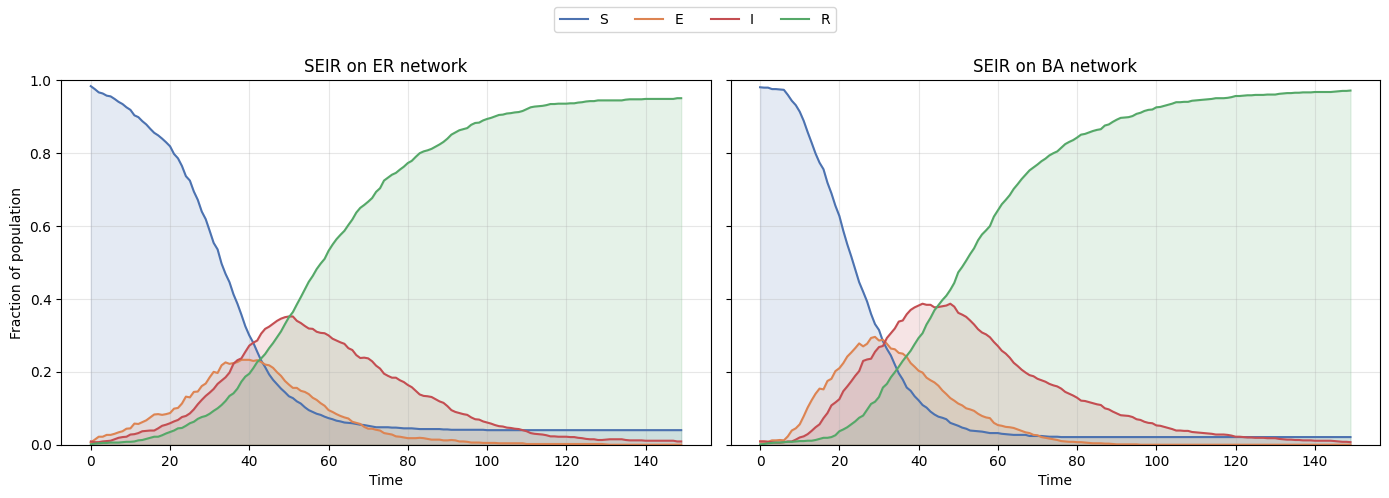

In [27]:
# lower gamma
plot_seir_simulation(beta=0.2, sigma=0.1, gamma=0.05)

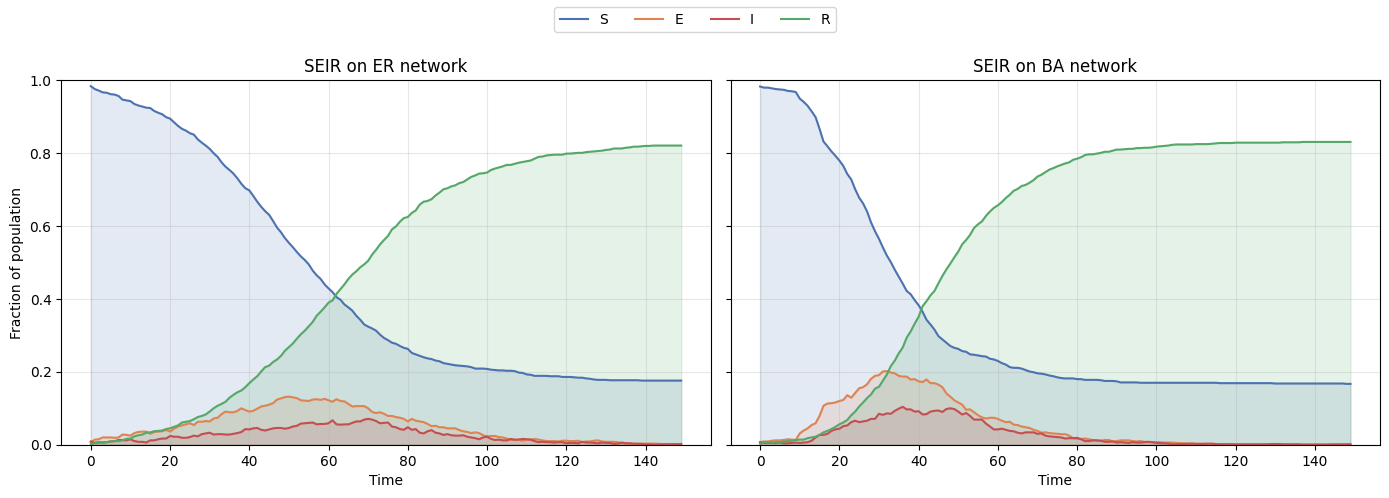

In [28]:
# higher gamma
plot_seir_simulation(beta=0.2, sigma=0.1, gamma=0.2)